In [ ]:
# Import Modules
import pandas as pd
import os
import json
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as pl


In [2]:
# Load .env environment variables into the notebook
load_dotenv()

True

In [3]:
# Get the API key from the environment variable and store as Python variable
nasdaq_api_key = os.getenv("NASDAQ_API_KEY")


In [5]:
ls -a


./                  .env                api_requests.ipynb
../                 .ipynb_checkpoints/ untitled.txt


In [6]:
# Using Manitoba Canada for the province code
province = "MB"

start_date = "2015-09-30"
end_date = "2020-09-30"

url = f"https://data.nasdaq.com/api/v3/datasets/CMHC/HPPU50_{province}?start_date={start_date}&end_date={end_date}&api_key={nasdaq_api_key}"


In [7]:
# Get and store response
response = requests.get(url).json()

In [8]:
# The response is of type dictionary
type(response)

dict

In [9]:
# Print the response
print(response)

{'dataset': {'id': 34650750, 'dataset_code': 'HPPU50_MB', 'database_code': 'CMHC', 'name': 'Average, Median and Price Percentiles for Unabsorbed Homeowner and Condominium Units (Provinces) - Manitoba', 'description': 'Average, Median and Price Percentiles for Unabsorbed Homeowner and Condominium Units (Provinces). For more information, please see <a href=https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/ScsMasMethodology>https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/ScsMasMethodology</a>', 'refreshed_at': '2021-05-14T03:25:41.789Z', 'newest_available_date': '2021-03-31', 'oldest_available_date': '1990-01-31', 'column_names': ['Date', '1st 20%', '2nd 40%', '3rd 60%', '4th 80%', 'Median', 'Average', 'Units'], 'frequency': 'monthly', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2015-09-30', 'end_date': '2020-09-30', 'data': [['2020-09-30', 330000.0, 400000.0, 480000.0, 580000.0, 447500.0, 481336.0, 274.0]

In [11]:
# json.dumps is a convenient method for printing dict/json objects
print(json.dumps(response, indent=10))

{
          "dataset": {
                    "id": 34650750,
                    "dataset_code": "HPPU50_MB",
                    "database_code": "CMHC",
                    "name": "Average, Median and Price Percentiles for Unabsorbed Homeowner and Condominium Units (Provinces) - Manitoba",
                    "description": "Average, Median and Price Percentiles for Unabsorbed Homeowner and Condominium Units (Provinces). For more information, please see <a href=https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/ScsMasMethodology>https://www03.cmhc-schl.gc.ca/hmip-pimh/en/TableMapChart/ScsMasMethodology</a>",
                    "refreshed_at": "2021-05-14T03:25:41.789Z",
                    "newest_available_date": "2021-03-31",
                    "oldest_available_date": "1990-01-31",
                    "column_names": [
                              "Date",
                              "1st 20%",
                              "2nd 40%",
                              "3rd 

In [12]:
# Access the third element of the first list inside `data`
response["dataset"]["data"]

[['2020-09-30',
  330000.0,
  400000.0,
  480000.0,
  580000.0,
  447500.0,
  481336.0,
  274.0],
 ['2020-08-31',
  330000.0,
  406000.0,
  482000.0,
  571000.0,
  450000.0,
  465718.0,
  258.0],
 ['2020-07-31',
  330000.0,
  395000.0,
  480000.0,
  580000.0,
  437500.0,
  465846.0,
  270.0],
 ['2020-06-30',
  335000.0,
  425000.0,
  490000.0,
  590000.0,
  460000.0,
  480207.0,
  326.0],
 ['2020-05-31',
  330000.0,
  415000.0,
  485000.0,
  590000.0,
  450000.0,
  480609.0,
  329.0],
 ['2020-04-30',
  335000.0,
  425000.0,
  490000.0,
  595000.0,
  460000.0,
  489191.0,
  359.0],
 ['2020-03-31',
  330000.0,
  400000.0,
  485000.0,
  597000.0,
  450000.0,
  481412.0,
  372.0],
 ['2020-02-29',
  330000.0,
  408000.0,
  485000.0,
  600000.0,
  450000.0,
  484373.0,
  351.0],
 ['2020-01-31',
  330000.0,
  410000.0,
  485000.0,
  610000.0,
  450000.0,
  492121.0,
  339.0],
 ['2019-12-31',
  330000.0,
  400000.0,
  475000.0,
  600000.0,
  445000.0,
  483632.0,
  351.0],
 ['2019-11-30',
  32

In [13]:
# Get list of column names
column_names = response["dataset"]["column_names"]


In [14]:
# Empty list to hold the series
list_series = []

# Convert each row to a series and append to the list
for row in response["dataset"]["data"]:
    list_series.append(pd.Series(row))

# Create Dataframe
housing_df = pd.DataFrame(data=list_series)


In [15]:
# Store column names
housing_df.columns = column_names

In [16]:
# Show DataFrame
housing_df

,Date,1st 20%,2nd 40%,3rd 60%,4th 80%,Median,Average,Units
0,2020-09-30,330000.0,400000.0,480000.0,580000.0,447500.0,481336.0,274.0
1,2020-08-31,330000.0,406000.0,482000.0,571000.0,450000.0,465718.0,258.0
2,2020-07-31,330000.0,395000.0,480000.0,580000.0,437500.0,465846.0,270.0
3,2020-06-30,335000.0,425000.0,490000.0,590000.0,460000.0,480207.0,326.0
4,2020-05-31,330000.0,415000.0,485000.0,590000.0,450000.0,480609.0,329.0
5,2020-04-30,335000.0,425000.0,490000.0,595000.0,460000.0,489191.0,359.0
6,2020-03-31,330000.0,400000.0,485000.0,597000.0,450000.0,481412.0,372.0
7,2020-02-29,330000.0,408000.0,485000.0,600000.0,450000.0,484373.0,351.0
8,2020-01-31,330000.0,410000.0,485000.0,610000.0,450000.0,492121.0,339.0
9,2019-12-31,330000.0,400000.0,475000.0,600000.0,445000.0,483632.0,351.0


<AxesSubplot:title={'center':'Median Prices for Manitoba'}, xlabel='Date', ylabel='Median'>

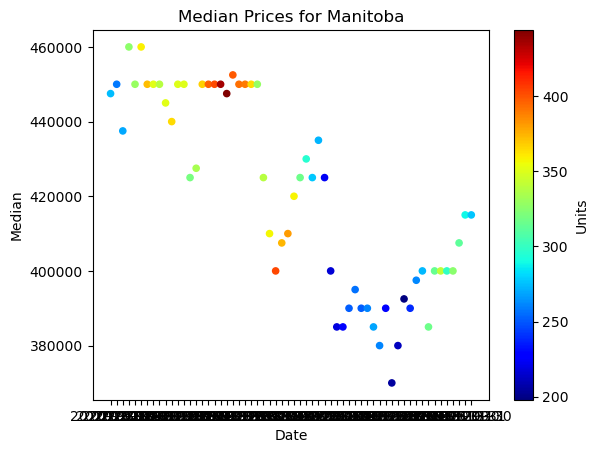

In [17]:
# Display scatter plot

housing_df.plot.scatter(
    x="Date", y="Median", c="Units", cmap="jet", title="Median Prices for Manitoba"
)
